In [1]:
#Importing all the relevant packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
df_price= pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,63023.0,3.110595,0.957551,1.0,3.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Postcode,63023.0,3125.673897,125.626877,3000.0,3056.0,3107.0,3163.0,3980.0
Propertycount,63023.0,7617.728131,4424.423167,39.0,4380.0,6795.0,10412.0,21650.0
Distance,63023.0,12.684829,7.592015,0.0,7.0,11.4,16.7,64.1


In [6]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [7]:
df.nunique()

Suburb             380
Address          57754
Rooms               14
Type                 3
Price             3417
Method               9
SellerG            476
Date               112
Postcode           225
Regionname           8
Propertycount      368
Distance           180
CouncilArea         34
dtype: int64

In [8]:
new_df = df[df['Price'].notnull()]
new_df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [9]:
regions= new_df['Regionname'].unique().tolist()
regions

['Northern Metropolitan',
 'Western Metropolitan',
 'Southern Metropolitan',
 'South-Eastern Metropolitan',
 'Eastern Metropolitan',
 'Northern Victoria',
 'Eastern Victoria',
 'Western Victoria']

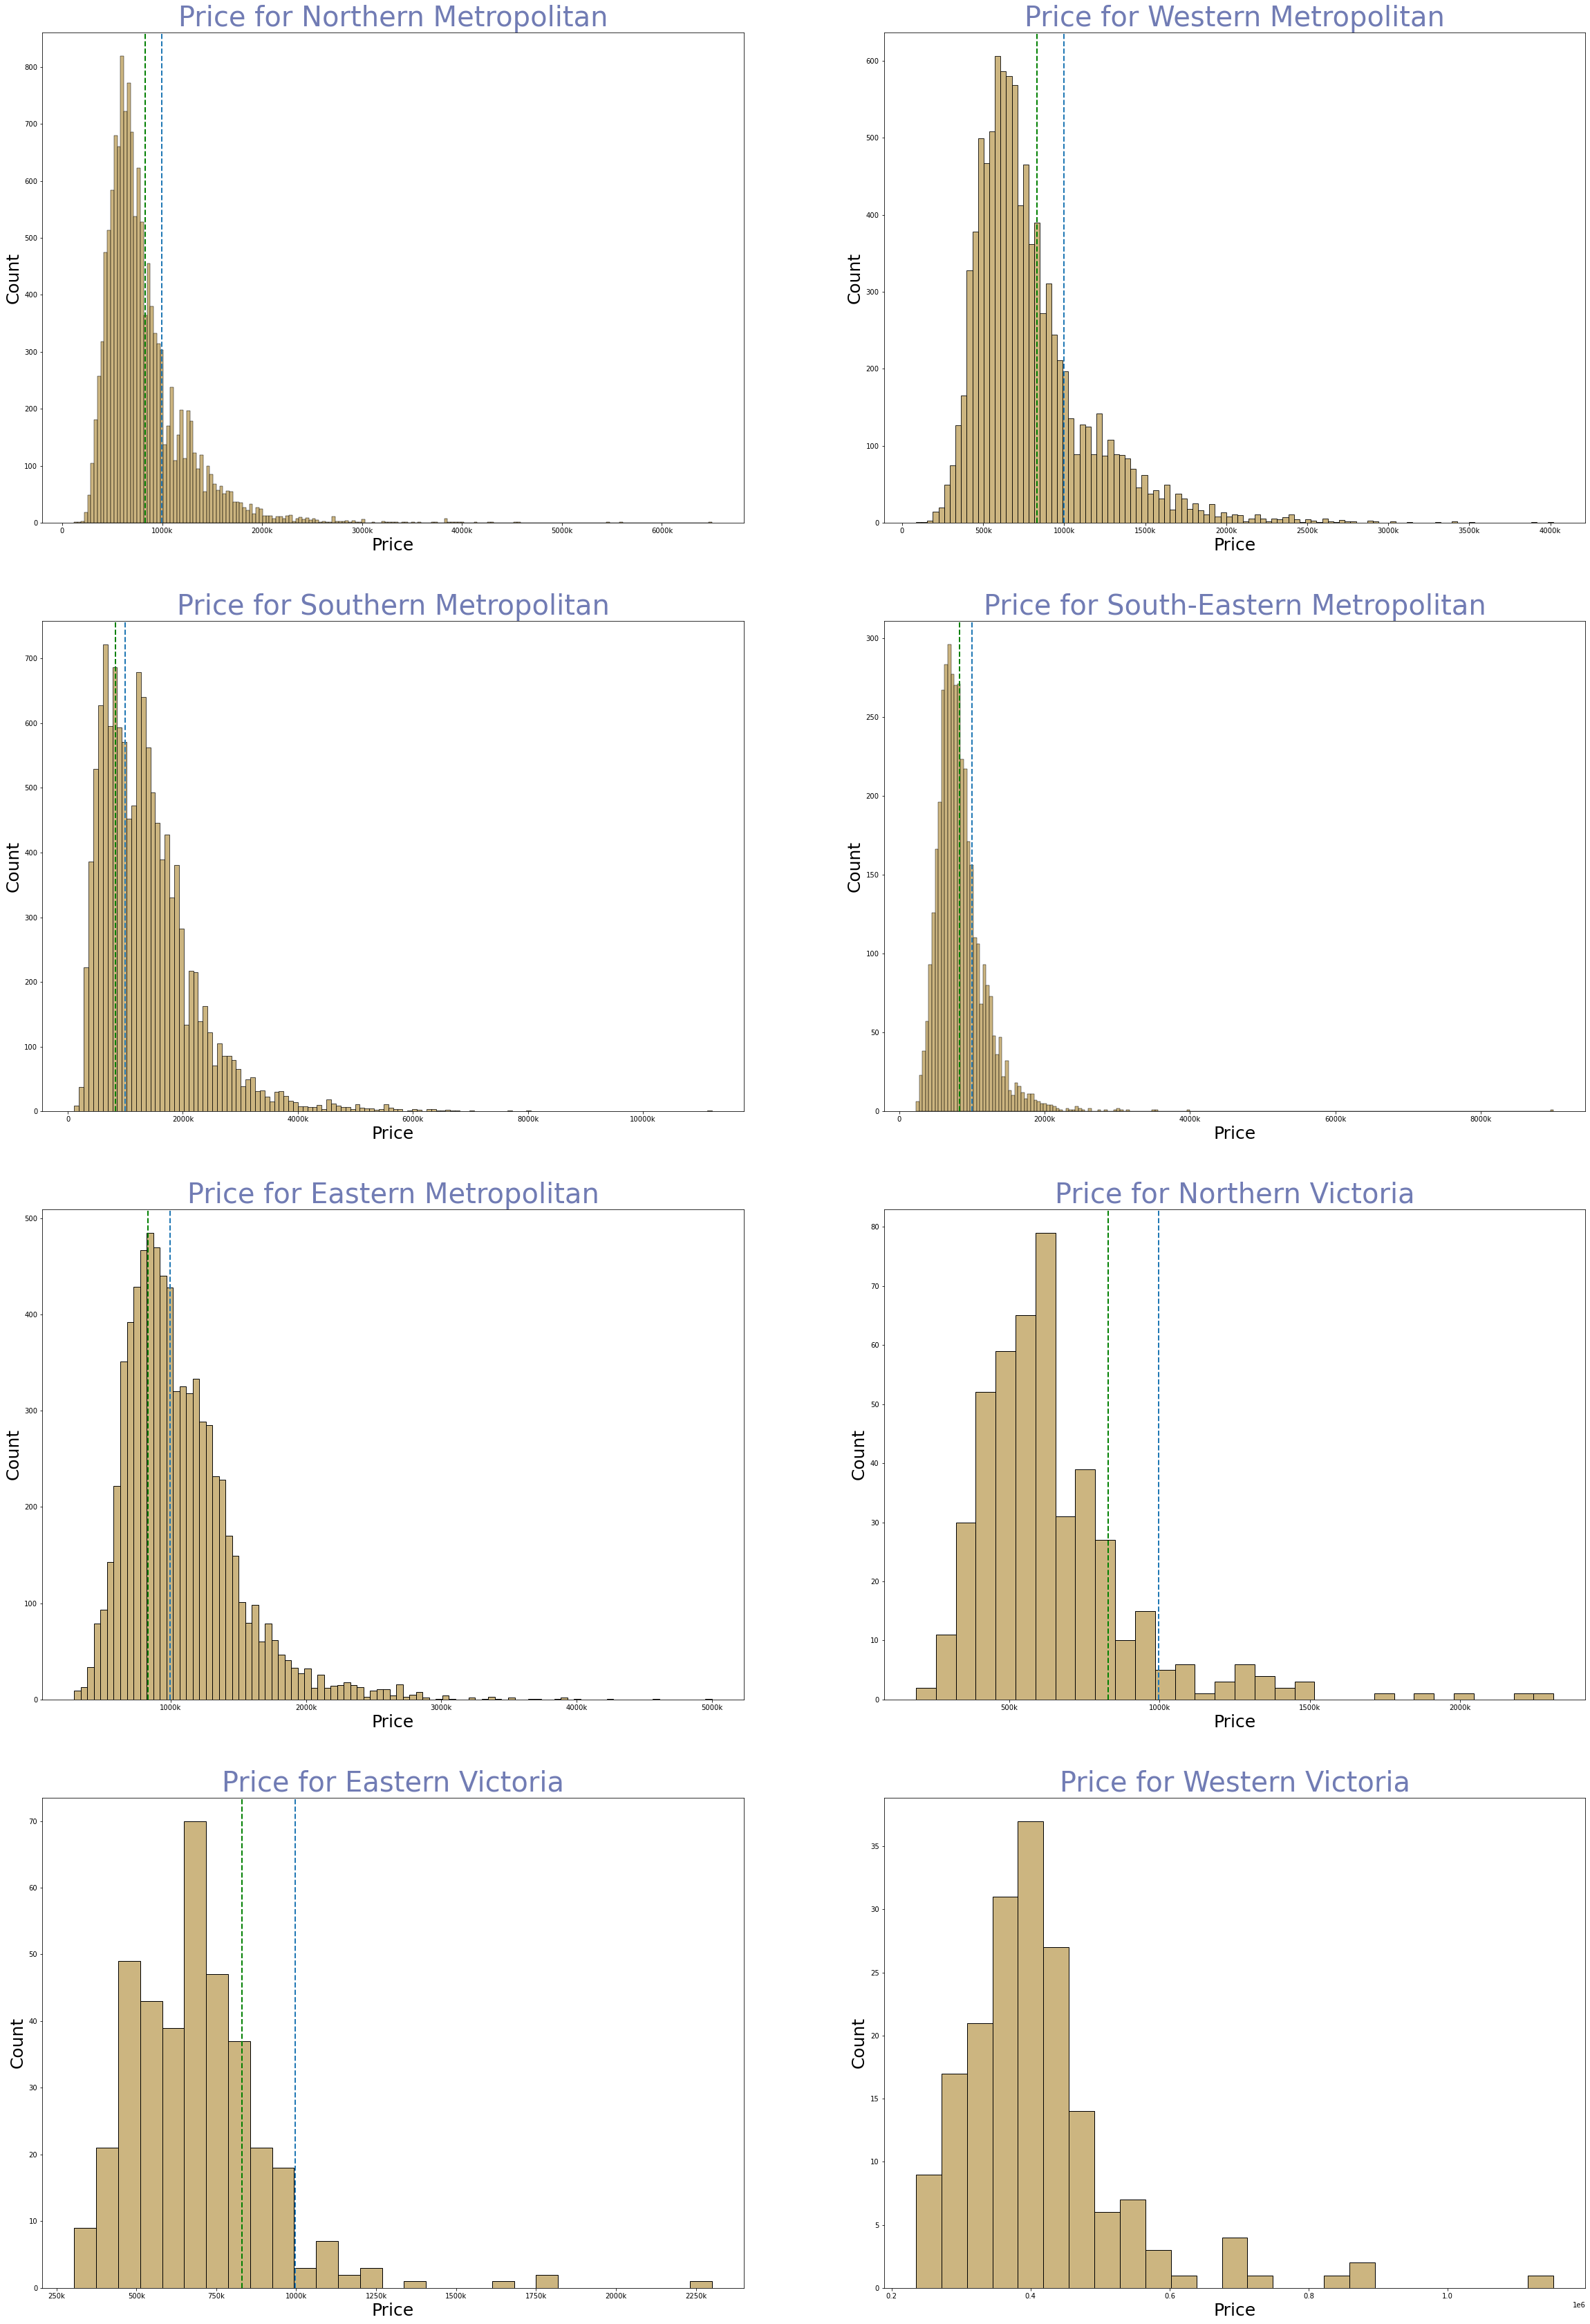

In [10]:
i=1
plt.rcParams['figure.figsize'] = 40, 60
sns.color_palette("Set2")
for region in regions:
    plt.axvline(x=df['Price'].mean(), linestyle='--', linewidth=2)
    plt.axvline(x=df['Price'].median(), linestyle='--', linewidth=2, color= 'green')
    plt.grid(b=True, which='minor', linestyle='--', alpha=0.8)
    plt.gca().xaxis.set_major_formatter(lambda x, pos: '0' if x==0 else '{:.0f}k'.format(x * 1e-3))
    plt.gca().xaxis.set_minor_formatter(lambda x, pos: '0' if x==0 else '{:.0f}k'.format(x * 1e-3))
    plt.subplot(4,2,i)
    plt.title('Price for '+ region, fontsize= 40, color= "#717cb4")
    sns.histplot(new_df[new_df['Regionname']==region]['Price'],  color="#bb9c55")
    plt.xlabel('Price', fontsize=25)
    plt.ylabel('Count', fontsize=25)
    i+=1


In [11]:
new_df['Date'] = pd.to_datetime(new_df['Date'], format="%d/%m/%Y")
new_df['Month'] = new_df['Date'].dt.month
new_df['Year'] = new_df['Date'].dt.year

In [12]:
new_df['Month'].unique()

array([ 4,  7,  9,  6,  2,  3, 12,  8, 11,  5,  1, 10], dtype=int64)

In [13]:
new_df[(new_df['Year']== 2017) & (new_df['Month']== 4)]['Price'].sum()

1990451132.0

In [115]:
new_df.groupby(['Year', 'MonthName'])['Price'].sum()

Year  MonthName
2016  January      7.912000e+06
      February     6.607175e+07
      March        0.000000e+00
      April        5.921479e+08
      May          1.740265e+09
      June         1.471965e+09
      July         8.005331e+08
      August       1.399245e+09
      September    1.795793e+09
      October      1.067836e+09
      November     2.355447e+09
      December     1.352294e+09
2017  January      0.000000e+00
      February     9.378064e+08
      March        1.478460e+09
      April        1.990451e+09
      May          2.167575e+09
      June         1.573378e+09
      July         1.584575e+09
      August       1.558209e+09
      September    2.168388e+09
      October      2.599904e+09
      November     2.088326e+09
      December     2.515969e+09
2018  January      1.204698e+09
      February     1.488891e+09
      March        2.605716e+09
      April        1.581404e+09
      May          1.939861e+09
      June         1.637031e+09
      July         9.091

In [116]:
import collections
d= {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July',\
    8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

new_df['MonthName'] = new_df['Month'].map(d)


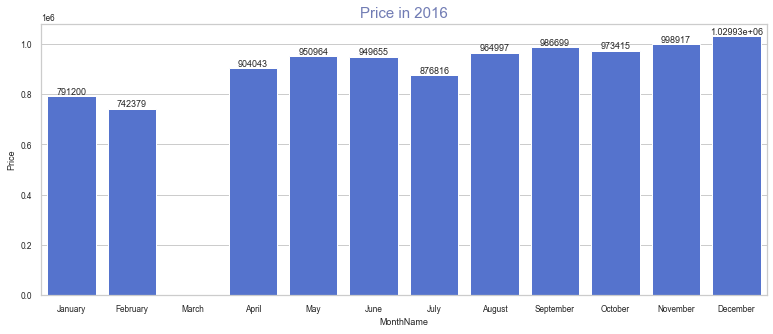

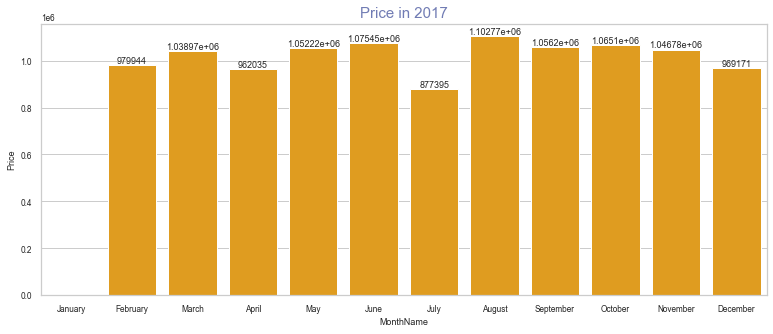

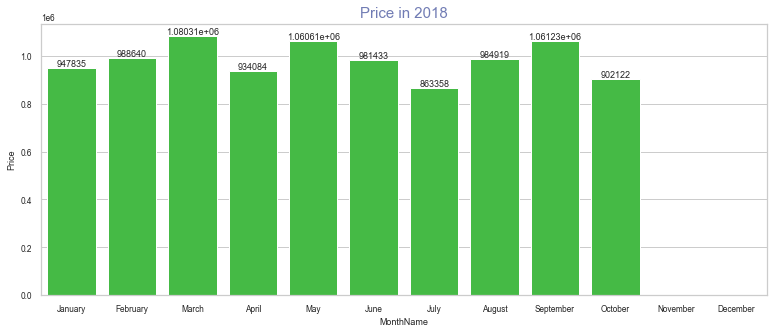

In [151]:
month= ['January', 'February', 'March', 'April',\
        'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Years= [2016, 2017, 2018]
colors= ['royalblue', 'orange', 'limegreen']
sns.set(style="whitegrid", font_scale=.75)
for Year, color in zip(Years, colors):
    plt.figure(figsize=[13, 5])
    ax= sns.barplot( x=new_df[new_df['Year']==Year]['MonthName'],y=new_df['Price'], color=color,\
                    order= month, ci=None)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('Price in ' + str(Year) , fontsize= 15, color= "#717cb4")
    

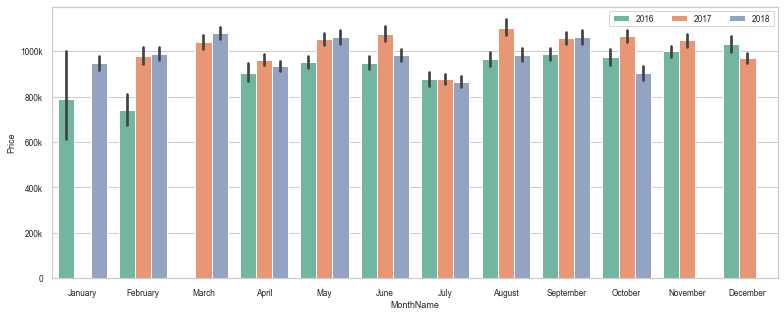

In [153]:
import calendar
sns.set_palette("Set2")
plt.figure(figsize=[13, 5])
ax= sns.barplot(x=new_df['MonthName'],y=new_df['Price'], hue= new_df['Year'], order= month) 
ax.legend(ncol=3, loc="upper right", frameon=True)
plt.gca().yaxis.set_major_formatter(lambda x, pos: '0' if x==0 else '{:.0f}k'.format(x * 1e-3))
sns.set(style="whitegrid", font_scale=.75)

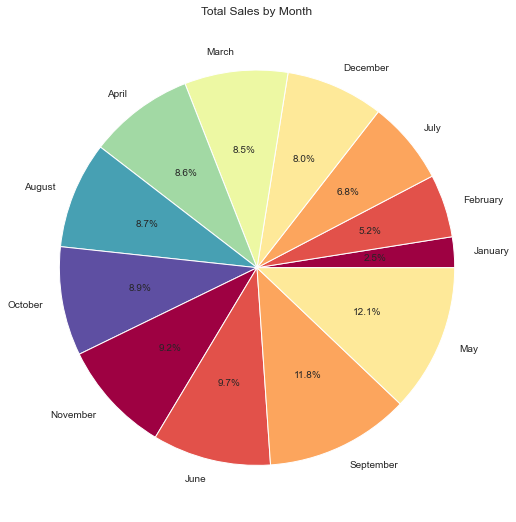

In [120]:
from matplotlib.gridspec import GridSpec
year_price= new_df[['MonthName', 'Price']].groupby('MonthName').sum()
year_price= year_price.Price.sort_values()
year_index= year_price.index

plt.figure(1, figsize=(20,20)) 
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(the_grid[0, 1], aspect=1, title='Total Sales by Month')
type_show_ids = plt.pie(year_price, labels=year_index, autopct='%1.1f%%', colors=colors)
plt.show()

In [210]:
Top_sellers= new_df[['SellerG','Regionname','Price']].groupby(['Regionname', 'SellerG']).\
count().sort_values('Price', ascending=False)
Top_sellers

Price
Regionname                 SellerG        
Northern Metropolitan      Nelson     2420
Southern Metropolitan      Buxton     1866
                           Jellis     1733
                           Marshall   1658
Western Metropolitan       Barry      1517
...                                    ...
Northern Metropolitan      Collin        1
Southern Metropolitan      Gardiner      1
                           G&H           1
                           For           1
South-Eastern Metropolitan Hamilton      1

[900 rows x 1 columns]

In [213]:
for region in regions:
    region= (new_df[new_df['Regionname']==region].groupby(['Regionname', 'SellerG']).\
    agg(TotalSales=('Price', 'count')).sort_values('TotalSales', ascending=False).head(10))
    
region

TotalSales
Regionname       SellerG                  
Western Victoria hockingstuart          36
                 Raine                  32
                 FN                     19
                 Ryder                  17
                 PRDNationwide          17
                 YPA                    13
                 Ray                    11
                 Reliance                9
                 Barry                   7
                 Biggin                  6